<a href="https://colab.research.google.com/github/stang715/Bitcoin_Price_Prediction/blob/main/bitcoin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitCoin Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
!pip install Prophet
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
# prompt: import pandas as pd

!pip install pandas
import pandas as pd


In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
# upload it to colab
# then write the following code to load the datat to this program
# initialize the dataframe's name as "df" and attach data to this name
df = pd.read_csv("/content/BTC-USD.csv") # date 03/21/2024

In [ ]:
#read_csv function from pandas

In [ ]:
# read it and display it at this cell:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,28175.816406,3.610219e+10
1,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,3.338202e+10
2,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,28333.972656,2.422043e+10
3,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,27493.285156,2.598031e+10
4,2023-03-25,27487.337891,27791.826172,27196.234375,27494.707031,27494.707031,1.338301e+10
...,...,...,...,...,...,...,...
362,2024-03-17,65316.343750,68845.718750,64545.316406,68390.625000,68390.625000,4.471686e+10
363,2024-03-18,68371.304688,68897.132813,66594.226563,67548.593750,67548.593750,4.926158e+10
364,2024-03-19,67556.132813,68106.929688,61536.179688,61912.773438,61912.773438,7.421584e+10
365,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# read more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.2+ KB


In [ ]:
# this helps us to get statistical info
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,35164.781634,35797.597448,34591.200345,35258.708862,35258.708862,2.009358e+10
std,10807.925044,11175.578658,10426.915736,10889.669640,10889.669640,1.317042e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27416.360840,27841.793945,26965.876465,27419.428711,27419.428711,1.214883e+10
50%,29916.952149,30391.109375,29682.470703,30010.596679,30010.596679,1.640836e+10
75%,42019.751953,42844.997070,41429.476562,42083.450196,42083.450196,2.287003e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
# proply express can create the entire graph with one line of code
# create our area graph here, and after enter [ px.area() ], you will see all parameters you can pass:
# first parameter is dataframe, here is "df"
# x axis is data, y axis is "close"
px.area(df, x = "Date", y= "Close")

In [ ]:
# get line graph, change area to line
px.line(df, x = "Date", y= "Close")

In [ ]:
# change y axis to volume, we can see the trasaction volume in the past one year
px.area(df, x = "Date", y= "Volume")

In [ ]:
# create a bar graph
px.bar(df, y= "Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

## Data Preperation

In [ ]:
# take a look at data first
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,28175.816406,3.610219e+10
1,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,3.338202e+10
2,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,28333.972656,2.422043e+10
3,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,27493.285156,2.598031e+10
4,2023-03-25,27487.337891,27791.826172,27196.234375,27494.707031,27494.707031,1.338301e+10
...,...,...,...,...,...,...,...
362,2024-03-17,65316.343750,68845.718750,64545.316406,68390.625000,68390.625000,4.471686e+10
363,2024-03-18,68371.304688,68897.132813,66594.226563,67548.593750,67548.593750,4.926158e+10
364,2024-03-19,67556.132813,68106.929688,61536.179688,61912.773438,61912.773438,7.421584e+10
365,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# creat a new dataframe with just date and close these two colomns
columns =['Date', 'Close']
ndf= pd.DataFrame(df, columns = columns)

In [ ]:
# check out the new dataframe
ndf

,Date,Close
0,2023-03-21,28175.816406
1,2023-03-22,27307.437500
2,2023-03-23,28333.972656
3,2023-03-24,27493.285156
4,2023-03-25,27494.707031
...,...,...
362,2024-03-17,68390.625000
363,2024-03-18,67548.593750
364,2024-03-19,61912.773438
365,2024-03-20,NaN


In [ ]:
  # since prophet doesn't understand date and close, we need to rename them to ds and y
  prophet_df = ndf.rename(columns ={'Date':'ds', 'Close': 'y'})

In [ ]:
# let's take a look
prophet_df

,ds,y
0,2023-03-21,28175.816406
1,2023-03-22,27307.437500
2,2023-03-23,28333.972656
3,2023-03-24,27493.285156
4,2023-03-25,27494.707031
...,...,...
362,2024-03-17,68390.625000
363,2024-03-18,67548.593750
364,2024-03-19,61912.773438
365,2024-03-20,NaN


## Creating Facebook Prophet Model

In [ ]:
# now it's time to create prophet model.
m = Prophet() # model is prophet
m.fit(prophet_df) # import our data: prophet_df to our model

# after running it, our prophet model is created and it was successful

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_p_ngdvf/ij7c3zry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_p_ngdvf/i7edzwbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24032', 'data', 'file=/tmp/tmp_p_ngdvf/ij7c3zry.json', 'init=/tmp/tmp_p_ngdvf/i7edzwbn.json', 'output', 'file=/tmp/tmp_p_ngdvf/prophet_modelo5nvvog8/prophet_model-20240321031412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:14:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:14:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
# first we create a dataframe for prediction the future stock price
# assign the number of periods in the ()
future = m.make_future_dataframe(periods = 30)
forecast =m.predict(future)

# after running it, the data will be loaded

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-21,28397.763261,24306.595958,32557.993629,28397.763261,28397.763261,0.514049,0.514049,0.514049,0.514049,0.514049,0.514049,0.0,0.0,0.0,28398.277310
1,2023-03-22,28395.498930,24770.432310,32348.977583,28395.498930,28395.498930,233.606632,233.606632,233.606632,233.606632,233.606632,233.606632,0.0,0.0,0.0,28629.105562
2,2023-03-23,28393.234600,24229.655934,32637.044668,28393.234600,28393.234600,69.516002,69.516002,69.516002,69.516002,69.516002,69.516002,0.0,0.0,0.0,28462.750602
3,2023-03-24,28390.970269,24541.879376,32409.496756,28390.970269,28390.970269,-21.522331,-21.522331,-21.522331,-21.522331,-21.522331,-21.522331,0.0,0.0,0.0,28369.447939
4,2023-03-25,28388.705939,24276.249198,32214.564692,28388.705939,28388.705939,-176.035122,-176.035122,-176.035122,-176.035122,-176.035122,-176.035122,0.0,0.0,0.0,28212.670817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2024-04-16,72252.643716,68679.247861,76097.212211,71842.063649,72624.173442,0.514049,0.514049,0.514049,0.514049,0.514049,0.514049,0.0,0.0,0.0,72253.157766
392,2024-04-17,72547.883349,68928.261404,76991.030414,72116.101118,72950.813917,233.606632,233.606632,233.606632,233.606632,233.606632,233.606632,0.0,0.0,0.0,72781.489981
393,2024-04-18,72843.122982,68877.863731,76981.679643,72388.262812,73275.950775,69.516002,69.516002,69.516002,69.516002,69.516002,69.516002,0.0,0.0,0.0,72912.638984
394,2024-04-19,73138.362614,69283.463471,76996.996887,72658.493259,73601.127685,-21.522331,-21.522331,-21.522331,-21.522331,-21.522331,-21.522331,0.0,0.0,0.0,73116.840284


In [ ]:
# since the yhat is the predicted value, let's create a line graph to clearly see it
px.line(forecast,x='ds', y='yhat')

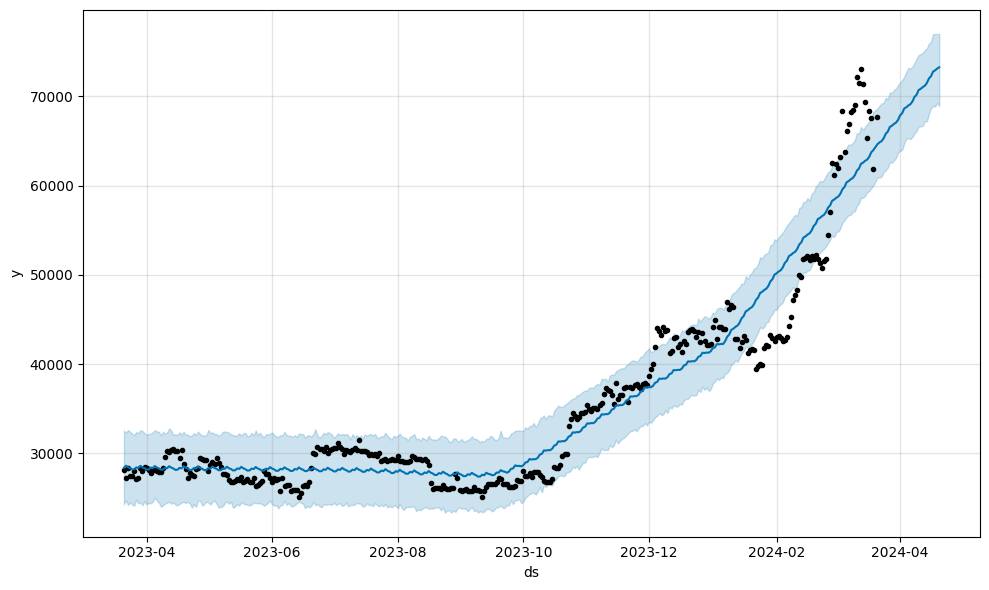

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

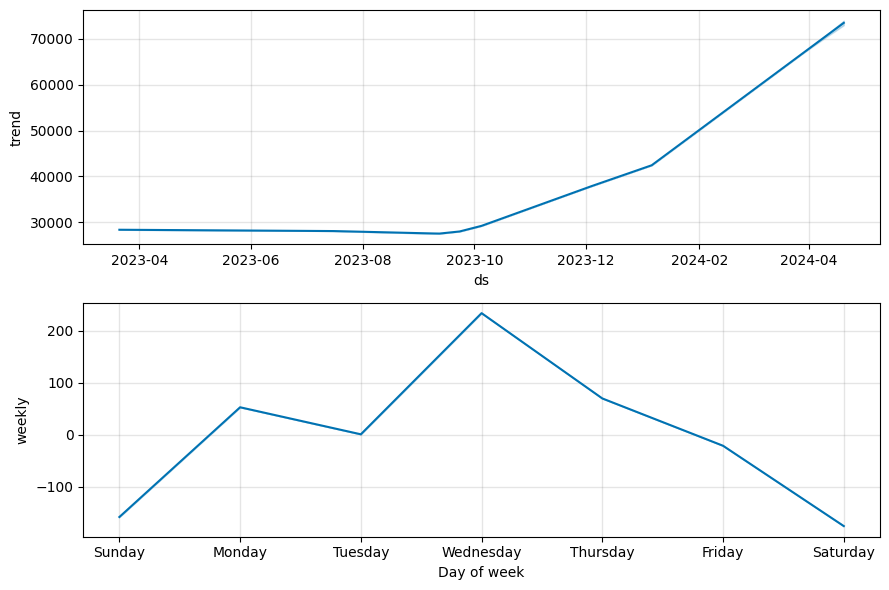

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>